# Pymaceuticals Inc.
---
### Analysis
#### General Observations and Comments
- This data set contains observed tumor volumes in 249 mice over a period of timepoints 0 to 45.
- Of the 9 drug regimens considered in this study, only 2 drug regimens (Capomulin and Ramicane) show a reduction in tumor volume in mice over time. The other drugs in the study had similar results to the control group.
- A control group recieved a placebo and was also tracked in the study.
- The study covered both male and female mice, with the two sexes represented equally.
  
#### Data Cleaned
- One mouse (g989) has data that appears to be duplicated and has been removed from consideration. This mouse received Propriva which did not show positive results in other mice.

#### An Outlier
- There was one mouse that received Infubinol that showed a reduction in tumor volume, but this data is a potential outlier and would need further explanation to consider if there is more to explore in the efficacy of this drug. This data point (36.32g) lies 2.52 standard deviations (std dev = 6.57) below the mean for Infubinol (52.88g). Since this measurement is not in a grouping, it can be considered an outlier.

#### Observations on Capomulin
- Capomulin shows promise as a tumor reducing drug. Most mice receiving this regimen had an observable reduction in their tumor sizes.
- This observable tumor reduction is similar in both Male and Female subjects.
- The reduction in size appears to be steady over the course of this study. In mouse (s185) there was a more significant reduction in tumor size between timepoints 5 ad 10.
- There is a 0.95 regression slope between mouse weight and average tumor volume indicating that this drug may need to adjust dosing based on weight. Although, the correlation between these factors is 0.526 and may need a larger test group to test for correlation.

#### Observations on Ramicane
- Ramicane shows similar results to Capomulin.
- In examining the correlation and regression of Ramicane with mouse weight and tumor volume, there is a similar level of correlation (0.497) as found with Capomulin, but the regression slope is 0.77 indicating potentially less of a direct relationship to weight and dosing being needed. Like Capomulin, a larger test group would be needed to establish this correlation.


###### 

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dependencies and Setup
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

pd.set_option('display.width', 1000) # Set output width to 1000 to prevent dataframe displayed split

# Study data files
mouse_metadata_path = os.path.join('data', 'Mouse_metadata.csv')
study_results_path = os.path.join('data', 'Study_results.csv')

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
print(f'Merged DataFrame: ')
print(df)

Merged DataFrame: 
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128    Capomulin  Female           9          22          0           45.000000                 0
1        f932     Ketapril    Male          15          29          0           45.000000                 0
2        g107     Ketapril  Female           2          29          0           45.000000                 0
3        a457     Ketapril  Female          11          30          0           45.000000                 0
4        c819     Ketapril    Male          21          25          0           45.000000                 0
...       ...          ...     ...         ...         ...        ...                 ...               ...
1888     r944    Capomulin    Male          12          25         45           41.581521                 2
1889     u364    Capomulin    Male          18          17         45           31.023923                 3
1890     

In [2]:
# Checking the number of mice.
print(f"Total number of mice in study: {df['Mouse ID'].nunique()}")

Total number of mice in study: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
unique_duplicated_mouse_IDs = duplicate_mice['Mouse ID'].unique()
duplicated_mouse = unique_duplicated_mouse_IDs[0]

# Print the duplicate mice
print('Duplicated mouse IDs found in DataFrame:')
print(duplicated_mouse)

Duplicated mouse IDs found in DataFrame:
g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mouse_id_data = df.loc[df['Mouse ID'] == duplicated_mouse]
print(f'All data for duplicated mouse ID: {duplicated_mouse}')
duplicated_mouse_id_data

All data for duplicated mouse ID: g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'] != duplicated_mouse]
print(f'Clean DataFrame without duplicated mouse ID data (Mouse {duplicated_mouse})')
clean_df

Clean DataFrame without duplicated mouse ID data (Mouse g989)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df['Mouse ID'].nunique()
print(f'Number of mice after removing data with duplicates: {mouse_count}')

Number of mice after removing data with duplicates: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculate mean
regimen_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# Calculate median
regimen_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# Calculate variance
regimen_variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

# Calculate standard deviation
regimen_std_dev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# Calculate SEM
regimen_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(sem)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_summary = pd.DataFrame({'Tumor Vol Mean': regimen_mean,
                                'Tumor Vol Median': regimen_median,
                                'Tumor Vol Variance': regimen_variance,
                                'Tumor Vol Std Dev': regimen_std_dev,
                                'Tumor Vol SEM': regimen_sem})

print('Summary Statistics generated with groupby:')
regimen_summary


Summary Statistics generated with groupby:


,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Tumor_Vol_Mean='mean',
    Tumor_Vol_Median='median',
    Tumor_Vol_Variance='var',
    Tumor_Vol_Std_Dev='std',
    Tumor_Vol_SEM=lambda x: sem(x))

print('Summary Statistics generated with aggregation:')
regimen_agg

Summary Statistics generated with aggregation:


,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Variance,Tumor_Vol_Std_Dev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Bar Chart generated using Pandas:


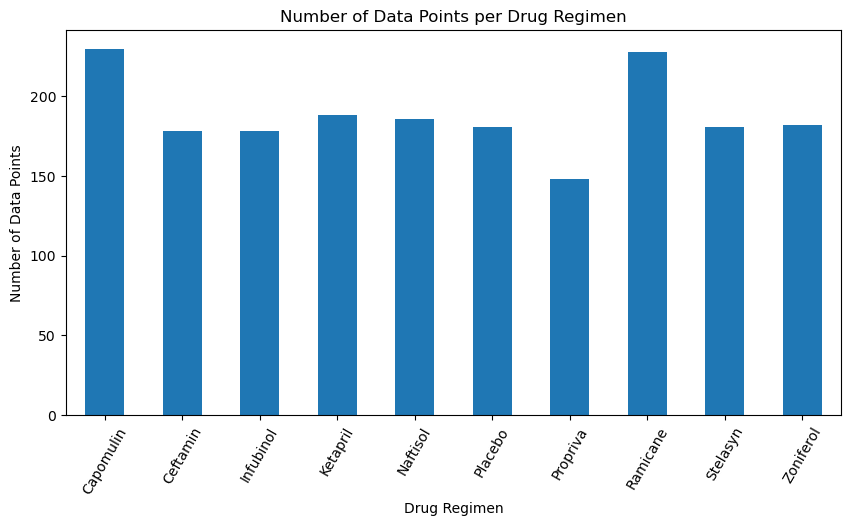

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_df = clean_df.groupby('Drug Regimen')['Mouse ID'].count()

print('Bar Chart generated using Pandas:')
regimen_df.plot(x=regimen_df.index, y=regimen_df, kind='bar', title='Number of Data Points per Drug Regimen', 
                xlabel='Drug Regimen', ylabel='Number of Data Points', figsize=(10, 5), rot=60);


Bar Chart generated using pyplot:


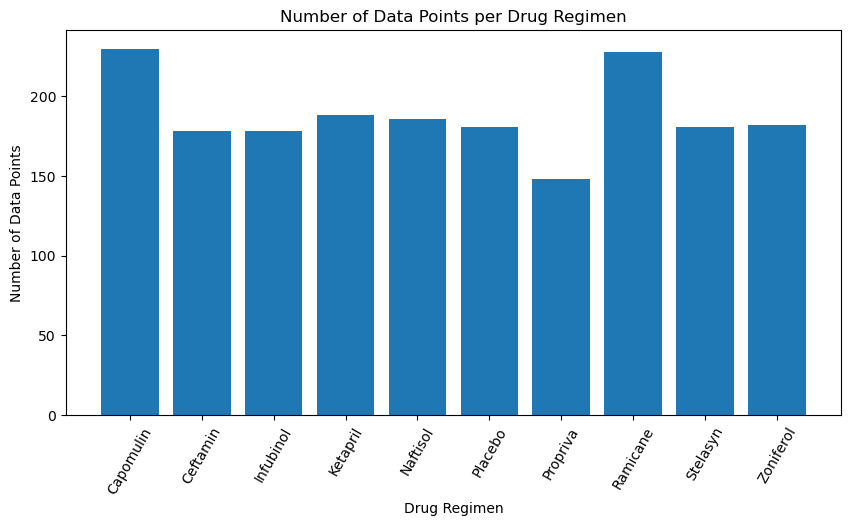

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
print('Bar Chart generated using pyplot:')

plt.figure(figsize=(10, 5))
plt.bar(regimen_df.index, regimen_df)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points per Drug Regimen')
plt.xticks(rotation=60)
plt.show()

Pie Chart generated using Pandas:


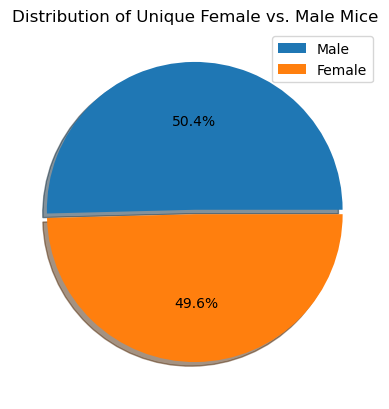

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
print('Pie Chart generated using Pandas:')

# Get the unique mice with their sex
mouse_sex_counts = clean_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()

# Make the pie chart
mouse_sex_counts.plot(kind='pie', 
                      title='Distribution of Unique Female vs. Male Mice', 
                      autopct='%1.1f%%', 
                      labels=None,
                      ylabel='', 
                      legend=True,
                      explode=(0.03, 0),
                      shadow=True);

Pie Chart generated using pyplot:


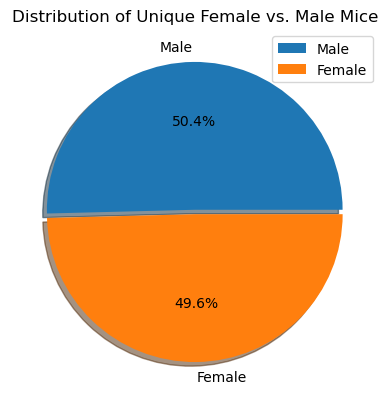

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
print('Pie Chart generated using pyplot:')

# Get the unique mice with their gender
# use mouse_sex_counts from above
plt.close()
# Make the pie chart
plt.pie(mouse_sex_counts, 
        labels=mouse_sex_counts.index, 
        autopct='%1.1f%%',
        explode=(0.03, 0),
        shadow=True)

plt.title('Distribution of Unique Female vs. Male Mice')
plt.legend(title='', loc='upper right')
plt.gca().set_yticklabels([])
plt.ylabel("")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_by_mouse = study_results.loc[study_results.groupby('Mouse ID')['Timepoint'].idxmax()]
last_timepoint_by_mouse = last_timepoint_by_mouse.reset_index()
last_timepoint_by_mouse = last_timepoint_by_mouse[['Mouse ID', 'Timepoint']]
print("Data for each Mouse ID's final timepoint:")
print(last_timepoint_by_mouse)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_vol_with_regimen = pd.merge(last_timepoint_by_mouse, df, how='inner', on=['Mouse ID', 'Timepoint'])
box_df = final_tumor_vol_with_regimen[['Tumor Volume (mm3)', 'Drug Regimen']]

print()
print()
print('Tumor Volume and Drug Regimen at final timepoint for each mouse:')
print(box_df)

Data for each Mouse ID's final timepoint:
    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
244     z435         10
245     z578         45
246     z581         45
247     z795         45
248     z969         45

[249 rows x 2 columns]


Tumor Volume and Drug Regimen at final timepoint for each mouse:
     Tumor Volume (mm3) Drug Regimen
0             67.973419    Infubinol
1             65.525743    Infubinol
2             70.717621      Placebo
3             62.999356     Ceftamin
4             63.440686     Stelasyn
..                  ...          ...
244           48.710661     Propriva
245           30.638696     Ramicane
246           62.754451    Infubinol
247           65.741070     Naftisol
248           73.867845     Naftisol

[249 rows x 2 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
# outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_labels:
    outliers = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = box_df.loc[box_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'].astype(float).tolist()
    
    # add subset
    tumor_volumes.append(tumor_vol_data)

    # Convert to a Pandas Series
    tumor_vol_series = pd.Series(tumor_vol_data)
    
    # Determine quartiles
    quartiles = tumor_vol_series.quantile([0.25, 0.5, 0.75])
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    for volume in tumor_vol_data:
        if volume < lower_bound or volume > upper_bound:
            outliers.append(volume)
            
    output = f'''*******************
Drug Reginmen: {drug}
Upper Bound: {upper_bound}
Lower Bound: {lower_bound}
IQR: {iqr}
Outliers: {outliers}
'''
    print(output)


*******************
Drug Reginmen: Capomulin
Upper Bound: 51.83201549
Lower Bound: 20.70456164999999
IQR: 7.781863460000004
Outliers: []

*******************
Drug Reginmen: Ramicane
Upper Bound: 54.30681135
Lower Bound: 17.912664470000003
IQR: 9.098536719999998
Outliers: []

*******************
Drug Reginmen: Infubinol
Upper Bound: 82.74144559000001
Lower Bound: 36.83290494999999
IQR: 11.477135160000003
Outliers: [36.3213458]

*******************
Drug Reginmen: Ceftamin
Upper Bound: 87.66645829999999
Lower Bound: 25.355449580000002
IQR: 15.577752179999997
Outliers: []



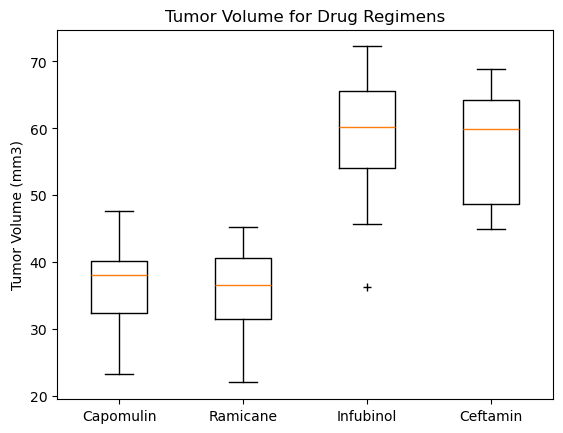

In [21]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Drug Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
flierprops = dict(marker='+', 
                  color='red')
ax1.boxplot(tumor_volumes, 
            labels=treatment_labels, 
            flierprops=flierprops)
plt.show()

## Line and Scatter Plots

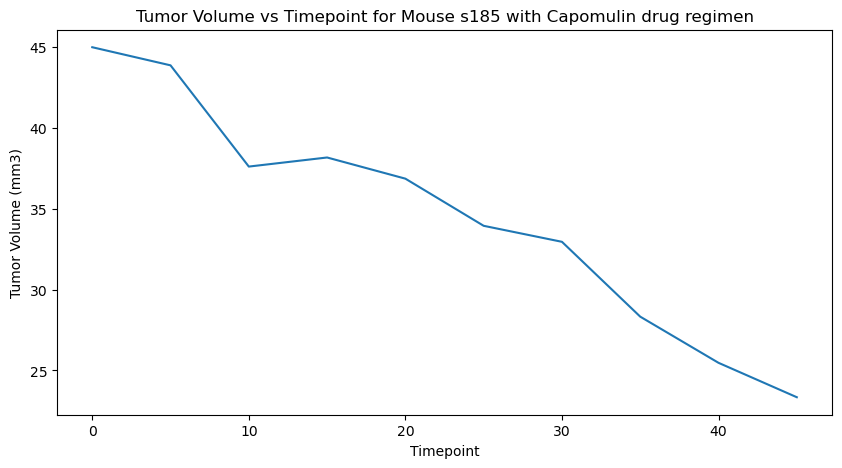

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)', 'Timepoint']]
# randomly select a mouse
capomulin_mouse = capomulin.sample(n=1)['Mouse ID']  # ran and selected Mouse ID s185

# Data for Mouse s185
capomulin_mouse_data = capomulin.loc[capomulin['Mouse ID'] == 's185', 
                                     ['Tumor Volume (mm3)', 'Timepoint']]
capomulin_mouse_data.plot(x='Timepoint', 
                          y='Tumor Volume (mm3)', 
                          kind='line', 
                          figsize=(10, 5), 
                          title='Tumor Volume vs Timepoint for Mouse s185 with Capomulin drug regimen',
                          legend=False)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

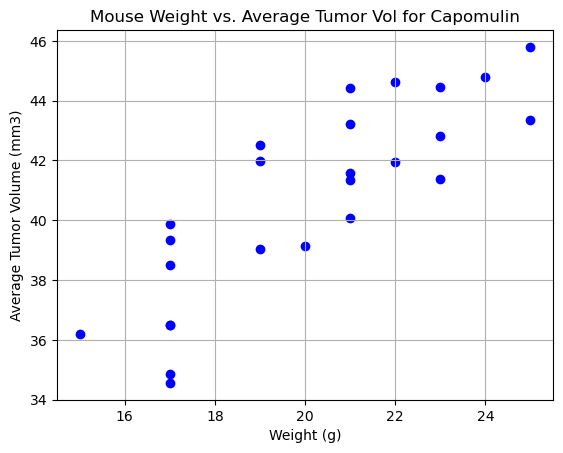

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# capomulin_vol = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', ['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)', 'Timepoint']]

capomulin = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse weight
average_tumor_volume = capomulin.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

# Create the scatter plot
plt.scatter(average_tumor_volume['Weight (g)'], 
            average_tumor_volume['Tumor Volume (mm3)'], 
            color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Vol for Capomulin')
plt.grid()
plt.show()


## Correlation and Regression

Correlation coefficient: 0.5256995552077175
Slope: 0.7696247878472222
Intercept: 25.163491795256984
R-squared: 0.6496844667454375
Regression: y = 0.770x + 25.163


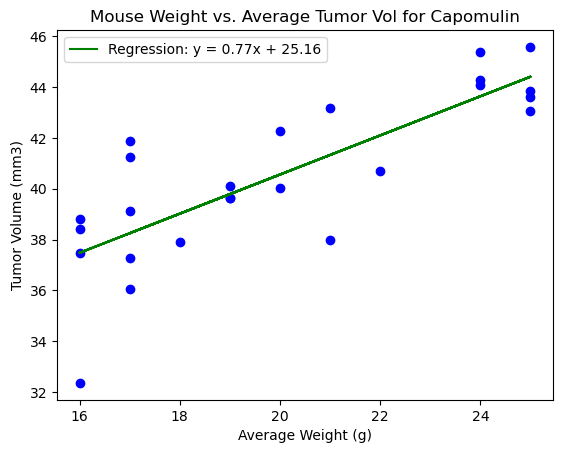

In [85]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = capomulin['Weight (g)'].corr(capomulin['Tumor Volume (mm3)'])
print(f'Correlation coefficient: {correlation}')


slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], 
                                                            average_tumor_volume['Tumor Volume (mm3)'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f'Regression: y = {slope:.3f}x + {intercept:.3f}')

regression_line = slope * average_tumor_volume['Weight (g)'] + intercept
slope = round(slope, 2)
intercept = round(intercept, 2)
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue')
plt.plot(average_tumor_volume['Weight (g)'], regression_line, 
         color='green', 
         label='Regression: y = ' + str(slope) + 'x + ' + str(intercept))
plt.title('Mouse Weight vs. Average Tumor Vol for Capomulin')
plt.xlabel('Average Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()

In [86]:
# Average tumor volume over the study for each drug regimen
pivot_df = clean_df.pivot(index=['Mouse ID', 'Drug Regimen'], columns='Timepoint', values='Tumor Volume (mm3)')
timepoints = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
drug_mean = pivot_df.groupby('Drug Regimen')[timepoints].mean() 

drug_mean = drug_mean.T
print('Average Tumor Volume (mm3) for each Timepoint by Drug Regimen')
drug_mean

Average Tumor Volume (mm3) for each Timepoint by Drug Regimen


Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


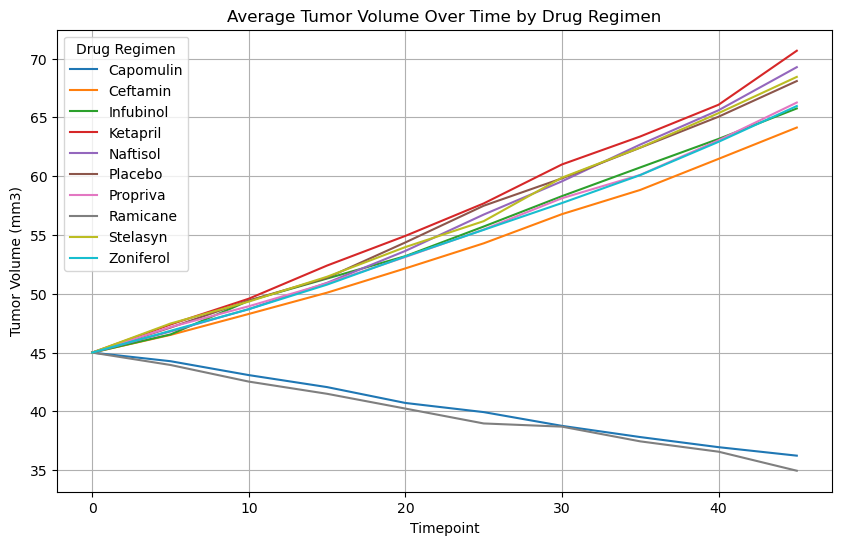

In [87]:
# Plot the data
plt.figure(figsize=(10, 6))

for column in drug_mean.columns:
    plt.plot(drug_mean.index, drug_mean[column], label=column)

# # Add title and labels
plt.title('Average Tumor Volume Over Time by Drug Regimen')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(title='Drug Regimen')
plt.grid()
plt.show()

Correlation coefficient: 0.4974174919206982
Slope: 0.7696247878472222
Intercept: 25.163491795256984
R-squared: 0.6496844667454375
Regression: y = 0.770x + 25.163


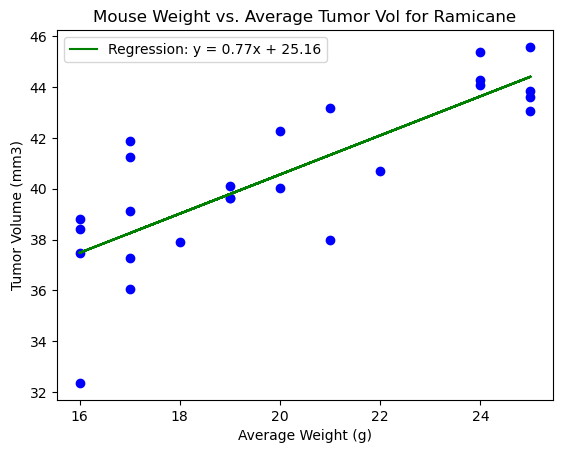

In [88]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Ramicane regimen
ramicane = clean_df[clean_df['Drug Regimen'] == 'Ramicane']

# Calculate the average tumor volume for each mouse weight
average_tumor_volume = ramicane.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean()

correlation = ramicane['Weight (g)'].corr(ramicane['Tumor Volume (mm3)'])
print(f'Correlation coefficient: {correlation}')


slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_volume['Weight (g)'], 
                                                            average_tumor_volume['Tumor Volume (mm3)'])
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f'Regression: y = {slope:.3f}x + {intercept:.3f}')

regression_line = slope * average_tumor_volume['Weight (g)'] + intercept
slope = round(slope, 2)
intercept = round(intercept, 2)
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='blue')
plt.plot(average_tumor_volume['Weight (g)'], regression_line, 
         color='green', 
         label='Regression: y = ' + str(slope) + 'x + ' + str(intercept))
plt.title('Mouse Weight vs. Average Tumor Vol for Ramicane')
plt.xlabel('Average Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()

In [92]:
box_df = final_tumor_vol_with_regimen[['Tumor Volume (mm3)', 'Drug Regimen', 'Sex']]
box_df = box_df[box_df['Drug Regimen'] == 'Capomulin']
# Put treatments into a list for for loop (and later for plot labels)

sexes = ['Male', 'Female']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
# outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for sex in sexes:
    outliers = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data = box_df.loc[box_df['Sex'] == sex, 'Tumor Volume (mm3)'].astype(float).tolist()
    
    # add subset
    tumor_volumes.append(tumor_vol_data)

    # Convert to a Pandas Series
    tumor_vol_series = pd.Series(tumor_vol_data)
    
    # Determine quartiles
    quartiles = tumor_vol_series.quantile([0.25, 0.5, 0.75])
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    for volume in tumor_vol_data:
        if volume < lower_bound or volume > upper_bound:
            outliers.append(volume)
            
    output = f'''*******************
Drug Reginmen: {sex}
Upper Bound: {upper_bound}
Lower Bound: {lower_bound}
IQR: {iqr}
Outliers: {outliers}
'''
    print(output)


*******************
Drug Reginmen: Male
Upper Bound: 53.3202905225
Lower Bound: 18.692880942499997
IQR: 8.656852395000001
Outliers: []

*******************
Drug Reginmen: Female
Upper Bound: 50.404404080000006
Lower Bound: 23.083913999999993
IQR: 6.830122520000003
Outliers: []



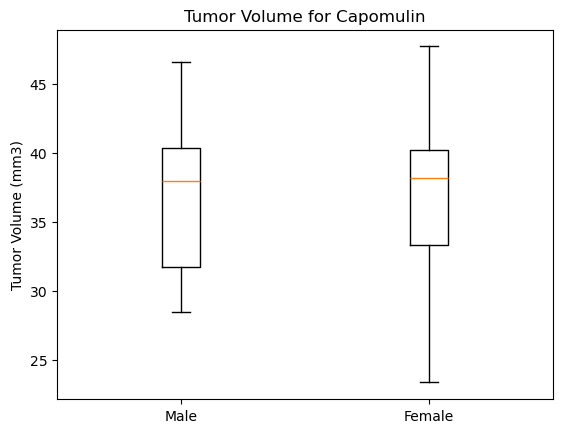

In [95]:
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
flierprops = dict(marker='+', 
                  color='red')
ax1.boxplot(tumor_volumes, 
            labels=sexes, 
            flierprops=flierprops)
plt.show()